<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [24]:
# импортирование библиотеки
import pandas as pd 

# чтение файла
data = pd.read_csv('dataset_real_estate.csv') 

# общая информация о датафрейме
data.info() 

# 5 первых строк датафрейма
display(data.head()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            23699 non-null  int64  
 1   total_images          23699 non-null  int64  
 2   last_price            23699 non-null  float64
 3   total_area            23699 non-null  float64
 4   first_day_exposition  23699 non-null  object 
 5   rooms                 23699 non-null  int64  
 6   ceiling_height        14504 non-null  float64
 7   floors_total          23613 non-null  float64
 8   living_area           21796 non-null  float64
 9   floor                 23699 non-null  int64  
 10  is_apartment          2775 non-null   object 
 11  studio                23699 non-null  bool   
 12  open_plan             23699 non-null  bool   
 13  kitchen_area          21421 non-null  float64
 14  balcony               12180 non-null  float64
 15  locality_name      

,Unnamed: 0,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### Вывод

Первое что бросается в глаза - это большое количество пропущенных значений, более чем в половине столбцов присутствуют пропуски. <br>
Далее заметен верблюжий регистр в столбцах <b> 'cityCenters_nearest', 'parks_around3000', 'ponds_around3000' </b>. <br>
Многие столбцы, значения в которых подразумевают целое число, имеют значения дробных чисел.

Приведение наименований столбцов к змеиному регистру и последующая проверка изменений.

In [25]:
data = data.rename(columns={'cityCenters_nearest':'city_centers_nearest', 'parks_around3000':'parks_around_3000', 'ponds_around3000':'ponds_around_3000'})

# проверка переименования столбцов
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            23699 non-null  int64  
 1   total_images          23699 non-null  int64  
 2   last_price            23699 non-null  float64
 3   total_area            23699 non-null  float64
 4   first_day_exposition  23699 non-null  object 
 5   rooms                 23699 non-null  int64  
 6   ceiling_height        14504 non-null  float64
 7   floors_total          23613 non-null  float64
 8   living_area           21796 non-null  float64
 9   floor                 23699 non-null  int64  
 10  is_apartment          2775 non-null   object 
 11  studio                23699 non-null  bool   
 12  open_plan             23699 non-null  bool   
 13  kitchen_area          21421 non-null  float64
 14  balcony               12180 non-null  float64
 15  locality_name      

## Предобработка данных

<b> Пропущенные значения: </b> <br>
* Логично предположить, что пропуск значения в столбце <b> 'balcony' </b> предполагает его отсутствие, также как и в столбцах <b> 'parks_around_3000', 'ponds_around_3000' </b> . <br>
* Пропуски в столбце <b> 'ceiling_height' </b> можно заменить на медианное значение. <br>
* Пропуски в столбце <b> 'is_apartment' </b> можно воспринимать как тип обычной жилой квартиры, то есть значение 'False', так как количество апартаментов в датасете крайне маленькое.

In [26]:
# просмотр значений 
display(data.value_counts('balcony')) 

# заполнение пропусков 
data['balcony'] = data['balcony'].fillna(value=0) 

balcony
1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
dtype: int64

In [27]:
# просмотр значений
display(data.value_counts('ceiling_height'))  

# нахождение медианного значения
median_ceiling_height = data['ceiling_height'].median()  

# заполнение пропусков медианой
data['ceiling_height'] = data['ceiling_height'].fillna(value=median_ceiling_height)  

ceiling_height
2.50      3515
2.60      1646
2.70      1574
3.00      1112
2.80       993
          ... 
3.88         1
3.93         1
3.98         1
4.06         1
100.00       1
Length: 183, dtype: int64

In [28]:
# просмотр значений 
display(data.value_counts('is_apartment')) 

# заполнение пропусков
data['is_apartment'] = data['is_apartment'].fillna(value=False)  

is_apartment
False    2725
True       50
dtype: int64

In [29]:
display(data['total_area'].corr(data['living_area']))
display(data['total_area'].corr(data['kitchen_area']))

data['living_area'] = data['living_area'].fillna(data['total_area'] * ((data['living_area'] / data['total_area']).median()))
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area'] * ((data['kitchen_area'] / data['total_area']).median()))

0.9395373338721494

0.6091211711198318

<b> Изменение типов данных: </b> <br>
* Столбец <b> 'is_apartment' </b> следует привести к булеву типу, так как используются булевы переменные. <br>
* Значения в столбцах <b> 'balcony', 'parks_around_3000', 'ponds_around_3000', 'floors_total', 'days_exposition' </b> показывают количество, следовательно логично привести их тип данных к целочисленному, однако с <b> 'floors_total', 'days_exposition' </b> мы не можем сделать такое, так как в них присутствуют пропуски, которые сложно чем-то заменить. <br>
* Тип данных в столбце <b> 'first_day_exposition' </b> переведен в datetime64.

In [30]:
# изменение типов данных столбцов
data['is_apartment'] = data['is_apartment'].astype('bool') 
data['balcony'] = data['balcony'].astype('int')
data['parks_around_3000'] = data['parks_around_3000'].astype('Int64')
data['ponds_around_3000'] = data['ponds_around_3000'].astype('Int64')
data['floors_total'] = data['floors_total'].astype('Int64')
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

# проверка внесенных изменений 
data.info() 
display(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            23699 non-null  int64         
 1   total_images          23699 non-null  int64         
 2   last_price            23699 non-null  float64       
 3   total_area            23699 non-null  float64       
 4   first_day_exposition  23699 non-null  datetime64[ns]
 5   rooms                 23699 non-null  int64         
 6   ceiling_height        23699 non-null  float64       
 7   floors_total          23613 non-null  Int64         
 8   living_area           23699 non-null  float64       
 9   floor                 23699 non-null  int64         
 10  is_apartment          23699 non-null  bool          
 11  studio                23699 non-null  bool          
 12  open_plan             23699 non-null  bool          
 13  kitchen_area    

,Unnamed: 0,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,...,25.000000,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.600000,1,...,11.000000,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.300000,4,...,8.300000,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,3,0,64900000.0,159.0,2015-07-24,3,2.65,14,90.289724,9,...,27.413793,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,...,41.000000,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0


## Расчёты и добавление результатов в таблицу

In [31]:
# функция для определения этажа
def type_of_floor(row): 
    floor = row['floor']
    last_floor = row['floors_total']
    
    try:
        if floor == 1:
            return 'Первый'
        elif floor == last_floor:
            return 'Последний'
        else:
            return 'Другой'
    except:
        return 'Другой'

# добавление столбцов
data['price_of_meter'] = round(data['last_price'] / data['total_area']).astype('int') # цена за метр
data['day'] = pd.DatetimeIndex(data['first_day_exposition']).day                      # день публикации объявления
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month                  # месяц публикации объявления
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year                    # год публикации объявления
data['living_on_total_area'] = round(data['living_area'] / data['total_area'], 2)     # соотношение жилой площади к общей
data['kitchen_on_total_area'] = round(data['kitchen_area'] / data['total_area'], 2)   # соотношение площади кухни к общей
data['type_of_floor'] = data.apply(type_of_floor, axis=1)                             # тип этажа
    
# проверка добавления 
display(data) 

,Unnamed: 0,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,ponds_around_3000,ponds_nearest,days_exposition,price_of_meter,day,month,year,living_on_total_area,kitchen_on_total_area,type_of_floor
0,0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.000000,8,...,2,755.0,NaN,120370,7,3,2019,0.47,0.23,Другой
1,1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.600000,1,...,0,NaN,81.0,82921,4,12,2018,0.46,0.27,Первый
2,2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.300000,4,...,2,574.0,558.0,92786,20,8,2015,0.61,0.15,Другой
3,3,0,64900000.0,159.00,2015-07-24,3,2.65,14,90.289724,9,...,3,234.0,424.0,408176,24,7,2015,0.57,0.17,Другой
4,4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.000000,13,...,1,48.0,121.0,100000,19,6,2018,0.32,0.41,Другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.300000,3,...,3,381.0,NaN,72491,21,3,2017,0.55,0.10,Другой
23695,23695,14,3100000.0,59.00,2018-01-15,3,2.65,5,38.000000,4,...,<NA>,NaN,45.0,52542,15,1,2018,0.64,0.14,Другой
23696,23696,18,2500000.0,56.70,2018-02-11,2,2.65,3,29.700000,1,...,<NA>,NaN,NaN,44092,11,2,2018,0.52,0.17,Первый
23697,23697,13,11475000.0,76.75,2017-03-28,2,3.00,17,43.583247,12,...,3,196.0,602.0,149511,28,3,2017,0.57,0.30,Другой


## Исследовательский анализ данных

* Основное количество квартир представлено с площадью от <b>40 до 70 квадратных метров</b>. <br>
* Основной <b>диапозон цен от 3,5 до почти 7 миллионов</b>, медианное значение - 4,7 миллионов. <br>
* Больше 90% объявлений <b>однокомнатные, двухкомнатные и трехкомнатные квартиры</b>. Однокомнатных и двухкомнатных почти равное количество, но однокомнатных все равно чуть-чуть больше. Количество трехкомнатных квартир примерно на 25% меньше от пикового значения. <br>
* Почти все квартиры по высоте потолков входят в <b>диапозон от 2.5 до 2.8 метров</b>.

<AxesSubplot:ylabel='Frequency'>

<AxesSubplot:>

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

<AxesSubplot:ylabel='Frequency'>

<AxesSubplot:>

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

<AxesSubplot:ylabel='Frequency'>

<AxesSubplot:>

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

<AxesSubplot:ylabel='Frequency'>

<AxesSubplot:>

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

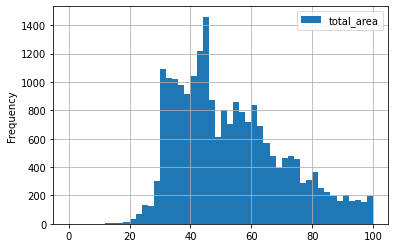

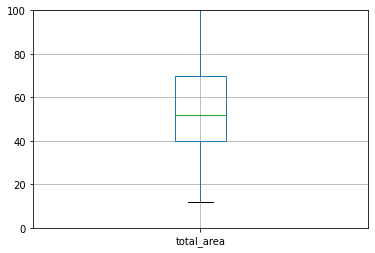

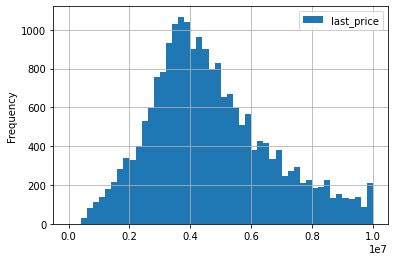

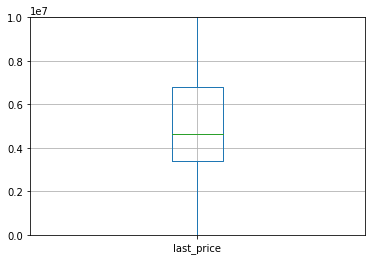

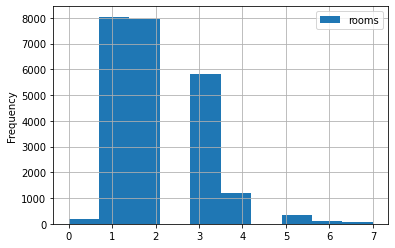

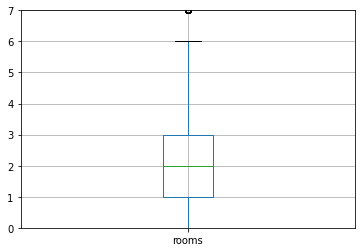

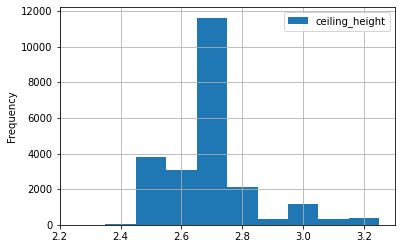

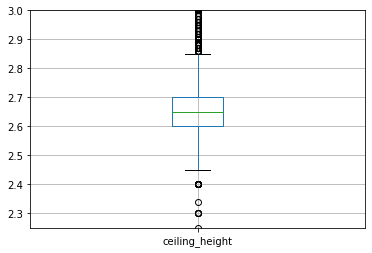

In [32]:
# гистограмма, ящик с усами и статистические данные для общей площади
display(data.plot(y='total_area', kind='hist', bins=50, range=(0, 100), grid=True))
display(data.plot(y='total_area', kind='box', ylim=(0, 100), grid=True))
display(data['total_area'].describe())

# гистограмма, ящик с усами и статистические данные для цены
display(data.plot(y='last_price', kind='hist', bins=50, range=(0, 10000000), grid=True))
display(data.plot(y='last_price', kind='box', ylim=(0, 10000000), grid=True))
display(data['last_price'].describe())

# гистограмма, ящик с усами, статистические данные и количество значений для количества комнат
display(data.plot(y='rooms', kind='hist', bins=10, range=(0, 7), grid=True))
display(data.plot(y='rooms', kind='box', ylim=(0, 7), grid=True))
display(data['rooms'].describe())
display(data['rooms'].value_counts())

# гистограмма, ящик с усами и статистические данные для высоты потолка
display(data.plot(y='ceiling_height', kind='hist', bins=10, range=(2.25, 3.25), grid=True))
display(data.plot(y='ceiling_height', kind='box', ylim=(2.25, 3), grid=True))
display(data['ceiling_height'].describe())

* Продажа квартиры <b> в среднем занимает чуть больше 3-х месяцев, а именно 95 дней </b>, это число соответствует медианному значению по столбцу <b> 'days_exposition' </b>. Выбор медианного значение вместо среднего обусловлен большим количеством выбросов, значений, которые сильно выбиваются из основной массы. <br>
* Логично считать очень быстрыми продажами, значения меньше первого квартиля Q1, то есть <b> меньше 45 дней. </b> <br>
* Точно так же поступим и с выявлением необычно долгих продаж, очень долгие продажи - продажи больше третьего квартиля Q3, <b> больше 232 дней. </b> <br>
* Наибольшее количество продаж (мода) приходится на срок от <b>40-50 дней, иными словами, полтора месяца с момента публикации.</b> 

95.0

'Медиана'

180.88863436982163

'Среднее значение'

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:ylabel='Frequency'>

<AxesSubplot:>

count    16604.000000
mean        93.106360
std         75.008386
min          1.000000
25%         35.000000
50%         68.000000
75%        138.000000
max        300.000000
Name: days_exposition, dtype: float64

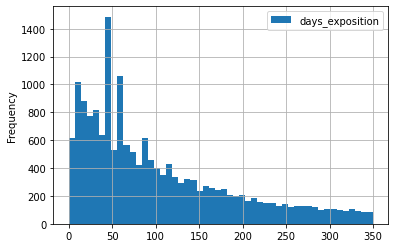

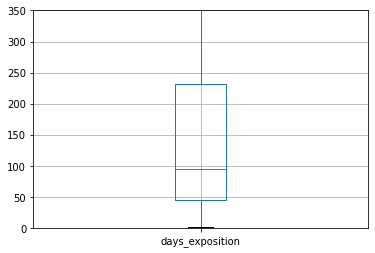

In [33]:
# медианна, среднее значение и остальные статистические данные для времени продажи 
display(data['days_exposition'].median(), 'Медиана')
display(data['days_exposition'].mean(), 'Среднее значение')
display(data['days_exposition'].describe())

# гистограмма и диаграмма размаха для времени продажи
display(data.plot(y='days_exposition', kind='hist', bins=50, range=(0, 350), grid=True))
display(data.plot(y='days_exposition', kind='box', ylim=(0, 350), grid=True))

display(data.query('days_exposition <= 300')['days_exposition'].describe())

<b> Зависимость цены квартиры от разных параметров: </b> <br>
Для рассчета среднего показателя было взято медианное значение, так как в данных присутствуют выбросы. <br>
* Коэффициент корреляции между общей площадью и ценой 0.65, показывает <b>умеренную зависимость</b>. <br>
* Зависимость от количества комнат - <b>положительная и слабая</b>, коэффициент корреляции 0.36. <br>
* <b>Очень слабая отрицательная</b> зависимость между ценой и удаленностью от центра по общим данным, коэффициент корреляции -0.2. <br>
* <b>Зависимость цены от дня продажи не выявлена</b>, на графике нет ярко выраженного восходящего или нисходящего тренда. <br>
* Средняя цена продажи квартиры достигает <b>пикового значения в апреле</b>, и падает до <b>минимального значения к июню</b> (почти на 10%). <br>
* Средняя стоимость квартиры в <b>2014 году составляет 7,75 миллионов</b> рублей, и <b>к 2016 году стремительно падает на 40%</b> и составляет 4,5 миллионов, держится на этом уровне еще два года, и <b>к 2019 году начинает расти</b>, прибавляя чуть больше 10%.<br>
* Стоимость квартир <b>"другого" этажа в среднем выше</b> квартир на первом и последнем этажах примерно на 20%, также квартиры на <b>первом этаже стоят меньше всех остальных.</b>

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

0.6536750579657242

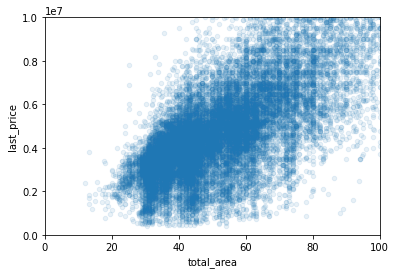

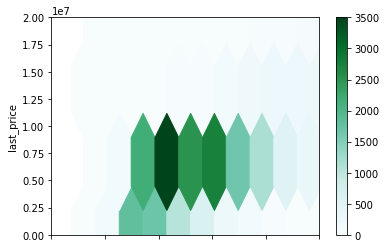

In [34]:
# точечная диаграмма, ячеечная диаграмма и коэффициент корреляции для общей площади и цены
display(data.plot(x='total_area', y='last_price', kind='scatter', xlim=(0, 100), ylim=(0, 10000000), alpha=0.1))
display(data.plot(x='total_area', y='last_price', kind='hexbin', xlim=(0, 100), ylim=(0, 20000000)))
display(data['total_area'].corr(data['last_price']))

<AxesSubplot:xlabel='rooms', ylabel='last_price'>

<AxesSubplot:xlabel='rooms', ylabel='last_price'>

0.3633428499648948

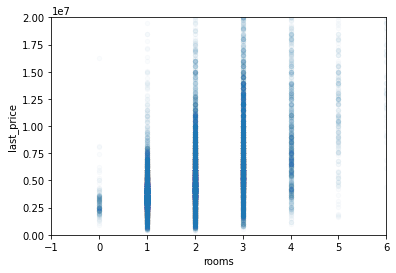

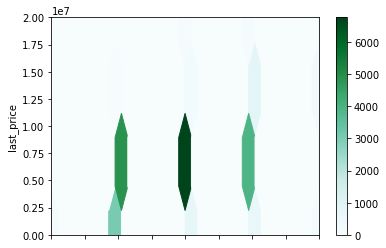

In [35]:
# точечная диаграмма, ячеечная диаграмма и коэффициент корреляции для количества комнат и цены
display(data.plot(x='rooms', y='last_price', kind='scatter', xlim=(-1, 6), ylim=(0, 20000000), alpha=0.02))
display(data.plot(x='rooms', y='last_price', kind='hexbin', xlim=(0, 4), ylim=(0, 20000000)))
display(data['rooms'].corr(data['last_price']))

<AxesSubplot:xlabel='city_centers_nearest', ylabel='last_price'>

<AxesSubplot:xlabel='city_centers_nearest', ylabel='last_price'>

-0.20674734874298373

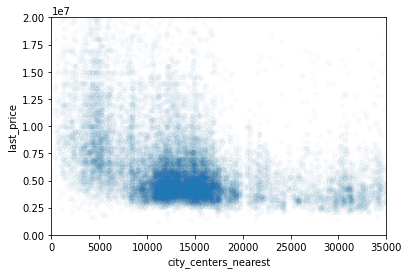

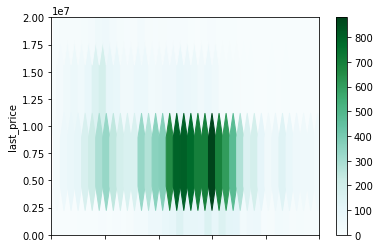

In [36]:
# точечная диаграмма, ячеечная диаграмма и коэффициент корреляции для расстояния до центра и цены
display(data.plot(x='city_centers_nearest', y='last_price', kind='scatter', xlim=(0, 35000), ylim=(0, 20000000), alpha=0.02))
display(data.plot(x='city_centers_nearest', y='last_price', kind='hexbin', xlim=(0, 25000), ylim=(0, 20000000)))
display(data['city_centers_nearest'].corr(data['last_price'])) 

<AxesSubplot:xlabel='day'>

<AxesSubplot:xlabel='month'>

<AxesSubplot:xlabel='year'>

<AxesSubplot:xlabel='type_of_floor'>

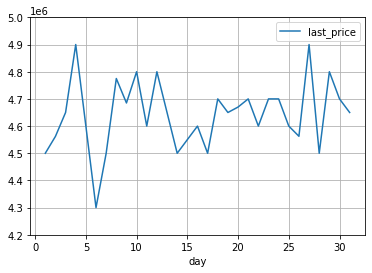

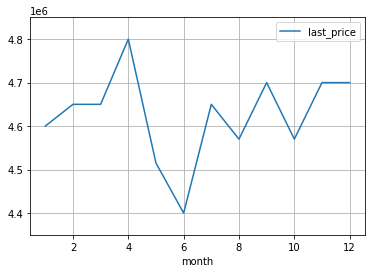

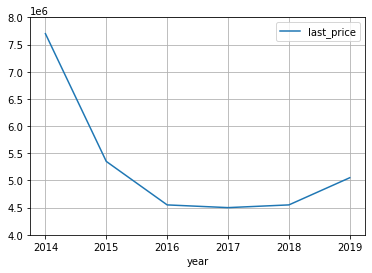

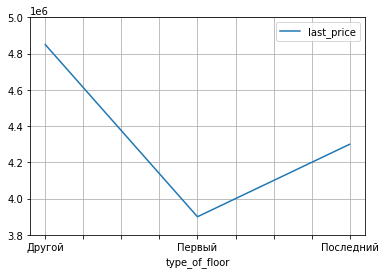

In [37]:
# линейный графики для дня, месяца, года и типа этажа

display(data.pivot_table(index='day', values='last_price', aggfunc='median').
        plot(y='last_price', ylim=(4200000, 5000000), grid=True))

display(data.pivot_table(index='month', values='last_price', aggfunc='median').
        plot(y='last_price', ylim=(4350000, 4850000), grid=True))

display(data.pivot_table(index='year', values='last_price', aggfunc='median').
        plot(y='last_price', ylim=(4000000, 8000000), grid=True))

display(data.pivot_table(index='type_of_floor', values='last_price', aggfunc='median').
        plot(y='last_price', ylim=(3800000, 5000000), grid=True))

* Самая высокая стоимость жилья в <b>Санкт-Петербурге</b>, составляет <b>114 849 рублей</b> за квадратный метр. <br>
* Самая низкая - в <b>Выборге</b>, составляет <b>58 141</b> рублей за квадратный метр. 

In [38]:
# формирование сводной таблицы по количеству объявлений в городах и по средней цене за объявление
sorted_city_data = data.pivot_table(index='locality_name', values='price_of_meter', aggfunc=['count', 'mean']) 

# переименование столбцов
sorted_city_data.columns = ['count', 'mean'] 

# выделение 10-ти городов по количеству объявлений
sorted_city_data = sorted_city_data.sort_values('count', ascending=False).head(10) 

# нахождение самого "дорогого" населенного пункта, посредством сортировки по средней цене
display(sorted_city_data.sort_values('mean', ascending=False))

,count,mean
locality_name,,
Санкт-Петербург,15721,114849.005788
Пушкин,369,103125.818428
деревня Кудрово,299,92473.588629
посёлок Парголово,327,90175.886850
посёлок Мурино,522,85752.181992
посёлок Шушары,440,78677.379545
Колпино,338,75424.571006
Гатчина,307,68746.110749
Всеволожск,398,68654.474874


* График сильно меняется на значении 7-ми километров от центра, после 7-ми километров цена медленно убывает. <br>
<b>Следовательно центральным районом можно считать все, что находится ближе 7-х километров.</b>

,price_of_meter
km_from_centers,
0.0,245833.518519
1.0,176640.637306
2.0,157944.324759
3.0,121299.659091
4.0,133035.837644
...,...
61.0,60606.000000
62.0,69114.000000
63.0,62500.000000


<AxesSubplot:xlabel='km_from_centers'>

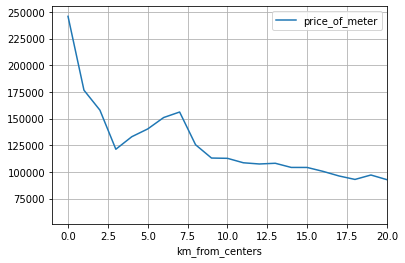

In [39]:
# добавлеие нового столбца с расстоянием до центра города в километрах
data['km_from_centers'] = round(data['city_centers_nearest'] / 1000) 

# формирование сводной таблицы для визуализации зависимости цены за квадратный метр от удаленности от центра в километрах
data_center = data.pivot_table(index='km_from_centers', values='price_of_meter', aggfunc='mean')

display(data_center)

# построение линейного графика
display(data_center.plot( kind='line', xlim=(-1, 20), grid=True))

* Квартиры в центре имеют <b>площадь от 65 до 120 квадратных метров</b>, это чуть ли не в два раза больше, чем диапозон значений по всей выборке (от 40 до 70 метров).<br> 
* Цена квартиры в центре города находится в <b>диапозоне от 7.5 до 15 миллионов</b>, что более чем в два раза превышает цену квартиры в общей выборке (от 3.5 до 7 миллионов).<br> 
* В центральном районе <b>преобладает количество двух-, трех- и четырехкомнатных квартир</b>, в отличие от общих данных, где в осноном однокомнатные, двухкомнатные и трехкомнатные квартиры.<br>
* <b>Диапозон значений высоты потолков в центре более разбросано</b>, нежели диапозон значений по всем квартирам, 2.65-3.30 против 2.6-2.7, также <b>потолки в центре в среднем выше</b>, 3.00 против 2.65. 

,Unnamed: 0,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,ponds_nearest,days_exposition,price_of_meter,day,month,year,living_on_total_area,kitchen_on_total_area,type_of_floor,km_from_centers
3,3,0,64900000.0,159.0,2015-07-24,3,2.65,14,90.289724,9,...,234.0,424.0,408176,24,7,2015,0.57,0.17,Другой,7.0
24,24,8,6500000.0,97.2,2015-10-31,2,2.65,3,46.500000,1,...,124.0,265.0,66872,31,10,2015,0.48,0.20,Первый,2.0
35,35,6,15500000.0,149.0,2017-06-26,5,2.65,5,104.000000,4,...,779.0,644.0,104027,26,6,2017,0.70,0.11,Другой,4.0
51,51,7,45000000.0,161.0,2017-10-17,3,3.20,8,38.000000,4,...,99.0,541.0,279503,17,10,2017,0.24,0.31,Другой,7.0
52,52,20,11795000.0,136.0,2017-09-22,6,3.00,2,94.000000,2,...,NaN,NaN,86728,22,9,2017,0.69,0.08,Последний,7.0


<AxesSubplot:ylabel='Frequency'>

count    3541.000000
mean       93.130827
std        59.372334
min        12.000000
25%        57.000000
50%        78.700000
75%       110.000000
max       631.200000
Name: total_area, dtype: float64

<AxesSubplot:ylabel='Frequency'>

count    3.541000e+03
mean     1.487211e+07
std      2.427090e+07
min      1.600000e+06
25%      6.650000e+06
50%      9.200000e+06
75%      1.450000e+07
max      7.630000e+08
Name: last_price, dtype: float64

<AxesSubplot:ylabel='Frequency'>

count    3541.000000
mean        2.834792
std         1.447612
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max        19.000000
Name: rooms, dtype: float64

3     1100
2     1036
1      520
4      493
5      217
6       83
7       54
0       17
8       10
9        3
10       2
11       2
14       1
16       1
15       1
19       1
Name: rooms, dtype: int64

<AxesSubplot:ylabel='Frequency'>

count    3541.000000
mean        2.953618
std         0.735648
min         2.400000
25%         2.650000
50%         2.800000
75%         3.150000
max        32.000000
Name: ceiling_height, dtype: float64

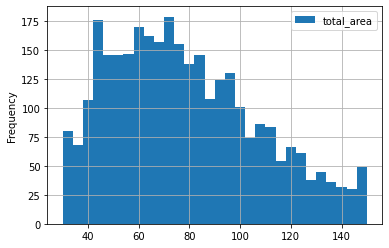

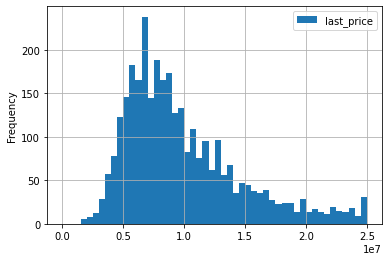

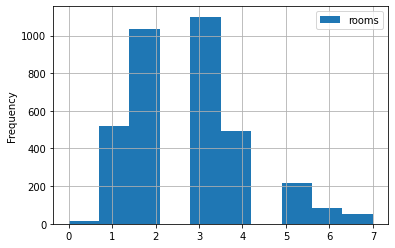

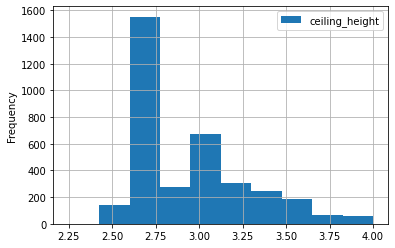

In [40]:
# датафрейм с квартирами в центре
center_data = data.query('km_from_centers <= 7') 
display(center_data.head())

# гистограмма и статистические данные для общей площади
display(center_data.plot(y='total_area', kind='hist', bins=30, range=(30, 150), grid=True))
display(center_data['total_area'].describe())

# гистограмма и статистические данные для цены
display(center_data.plot(y='last_price', kind='hist', bins=50, range=(0, 25000000), grid=True))
display(center_data['last_price'].describe())

# гистограмма, статистические данные и количество значений для количества комнат
display(center_data.plot(y='rooms', kind='hist', bins=10, range=(0, 7), grid=True))
display(center_data['rooms'].describe())
display(center_data['rooms'].value_counts())

# гистограмма и статистические данные для высоты потолка
display(center_data.plot(y='ceiling_height', kind='hist', bins=10, range=(2.25, 4), grid=True))
display(center_data['ceiling_height'].describe())

Зависимость цены квартир в центре от разных параметров:
* Площадь и цена имеют <b>среднюю по силе положительную зависимость</b>, а количество комнат и цена <b>слабую положительную зависимость</b>.<br>
* <b>Удаленность от центра никак не влияет на стоимость квартиры.</b>
* <b>Зависимость цены от дня, месяца, года продажи и типа этажа такая же, как и у квартир по общей выборке</b>, но стоит заметить, что амплитуда изменения в 2 раза больше в силу того, что средняя стоимость квартир в центре так же в 2 раза больше.
* Если сравнивать эти значения с значениями по общей выборке, то <b>кардинальных отличий нет</b>.

In [41]:
# коэффициент корреляции от площади
display(center_data['total_area'].corr(center_data['last_price']))

# коэффициент корреляции от количества комнат
display(center_data['rooms'].corr(center_data['last_price']))

# коэффициент корреляции от расстояния до центра
display(center_data['city_centers_nearest'].corr(center_data['last_price'])) 

0.6135037922760378

0.3145868724816908

-0.042098043899891135

<AxesSubplot:xlabel='day'>

<AxesSubplot:xlabel='month'>

<AxesSubplot:xlabel='year'>

<AxesSubplot:xlabel='type_of_floor'>

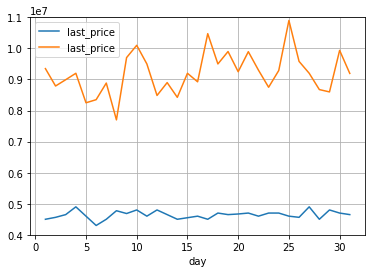

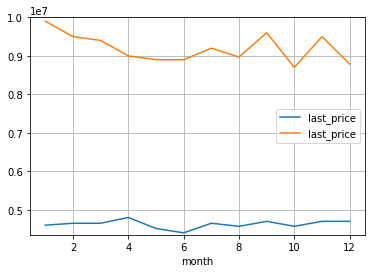

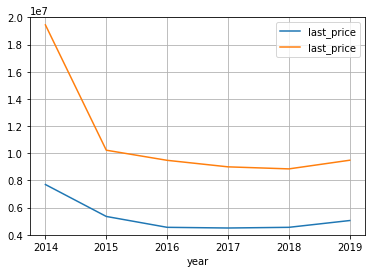

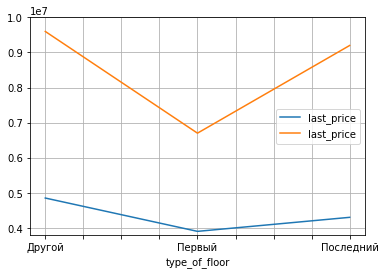

In [42]:
# линейный график зависимости цены квартиры в центре от дня продажи 
ax = (data.pivot_table(index='day', values='last_price', aggfunc='median')
      .plot(y='last_price', ylim=(4200000, 5000000), grid=True))
display(center_data.pivot_table(index='day', values='last_price', aggfunc='median').
        plot(y='last_price', ylim=(4000000, 11000000), grid=True, ax=ax, legend=True))

# линейный график зависимости цены квартиры в центре от месяца продажи 
ax = (data.pivot_table(index='month', values='last_price', aggfunc='median')
      .plot(y='last_price', ylim=(4350000, 4850000), grid=True))
display(center_data.pivot_table(index='month', values='last_price', aggfunc='median').
        plot(y='last_price', ylim=(4350000, 10000000), grid=True, ax=ax, legend=True))

# линейный график зависимости цены квартиры в центре от года продажи 
ax = (data.pivot_table(index='year', values='last_price', aggfunc='median')
      .plot(y='last_price', ylim=(4000000, 8000000), grid=True))
display(center_data.pivot_table(index='year', values='last_price', aggfunc='median').
        plot(y='last_price', ylim=(4000000, 20000000), grid=True, ax=ax, legend=True))

# линейный график зависимости цены квартиры в центре от типа этажа продажи 
ax = (data.pivot_table(index='type_of_floor', values='last_price', aggfunc='median')
      .plot(y='last_price', ylim=(3800000, 5000000), grid=True))
display(center_data.pivot_table(index='type_of_floor', values='last_price', aggfunc='median').
        plot(y='last_price', ylim=(3800000, 10000000), grid=True, ax=ax, legend=True))

## Общий вывод

* Продажа квартиры в среднем занимает **чуть больше 3-х месяцев**, быстрая продажа - **меньше полтора месяца**, очень долгая продажа - **более 7-ми с половиной месяцев**.<br>
* В первую очередь цена квартиры зависит от двух параметров: **площадь и ее удаленность от центра**.<br>
* Квартиры в центре это те квартиры, удаленность которых **не превышает 7-х километров**.<br>
* Сегмент объявлений в центральном районе имеет **несколько другие значения**, нежели объявления по всем населенным пунктам. Цены на квартиры в центре в среднем **более чем в два раза выше**, также площадь в среднем **больше в полтора раза**, количество комнат в среднем **больше на одну**, и высота потолков аналогично **выше.**